This is the first part of the Assignment (PUPIL DIAMETER ANALYSIS). The below code merges the data from folder 1 and 2, generating 2 csv files named merged_cued and merged_uncued. It contains overall combined data from folders 1 and 2.

In [3]:
import os
import pandas as pd

# Root directory
dataset_dir = "D2-8"

# Get list of participants
participants = [p for p in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, p))]

# Iterate through each participant
for participant in participants:
    participant_path = os.path.join(dataset_dir, participant)
    
    # Iterate through each emotion folder (E1, E2, E3)
    for emotion in ["E1", "E2", "E3"]:  # Emotion categories
        emotion_path = os.path.join(participant_path, emotion)

        if not os.path.exists(emotion_path):
            continue  # Skip if the emotion folder is missing

        cued_files = []
        uncued_files = []

        # Iterate through '1' and '2' folders
        for subfolder in ["1", "2"]:
            subfolder_path = os.path.join(emotion_path, subfolder)

            if not os.path.exists(subfolder_path):
                continue  # Skip if the subfolder doesn't exist

            cued_file = os.path.join(subfolder_path, "target_cued.csv")
            uncued_file = os.path.join(subfolder_path, "target_uncued.csv")

            if os.path.exists(cued_file):
                cued_files.append(pd.read_csv(cued_file))
            if os.path.exists(uncued_file):
                uncued_files.append(pd.read_csv(uncued_file))

        # Merge and save cued files
        if cued_files:
            merged_cued = pd.concat(cued_files, ignore_index=True)
            merged_cued.to_csv(os.path.join(emotion_path, "merged_cued.csv"), index=False)
            print(f"Merged cued trials saved: {emotion_path}/merged_cued.csv")

        # Merge and save uncued files
        if uncued_files:
            merged_uncued = pd.concat(uncued_files, ignore_index=True)
            merged_uncued.to_csv(os.path.join(emotion_path, "merged_uncued.csv"), index=False)
            print(f"Merged uncued trials saved: {emotion_path}/merged_uncued.csv")


Merged cued trials saved: D2-8\ADB\E1/merged_cued.csv
Merged uncued trials saved: D2-8\ADB\E1/merged_uncued.csv
Merged cued trials saved: D2-8\ADB\E2/merged_cued.csv
Merged uncued trials saved: D2-8\ADB\E2/merged_uncued.csv
Merged cued trials saved: D2-8\ADB\E3/merged_cued.csv
Merged uncued trials saved: D2-8\ADB\E3/merged_uncued.csv
Merged cued trials saved: D2-8\ASL\E1/merged_cued.csv
Merged uncued trials saved: D2-8\ASL\E1/merged_uncued.csv
Merged cued trials saved: D2-8\ASL\E2/merged_cued.csv
Merged uncued trials saved: D2-8\ASL\E2/merged_uncued.csv
Merged cued trials saved: D2-8\ASL\E3/merged_cued.csv
Merged uncued trials saved: D2-8\ASL\E3/merged_uncued.csv
Merged cued trials saved: D2-8\ASR\E1/merged_cued.csv
Merged uncued trials saved: D2-8\ASR\E1/merged_uncued.csv
Merged cued trials saved: D2-8\ASR\E2/merged_cued.csv
Merged uncued trials saved: D2-8\ASR\E2/merged_uncued.csv
Merged cued trials saved: D2-8\ASR\E3/merged_cued.csv
Merged uncued trials saved: D2-8\ASR\E3/merged_unc

In the next section, refining of the dataset is done. 
Removing data from t1 to t86 (As mentioned in the asignment)
Also, Trimming of dataset to remove extra empty columns after last valid time-series column is done.
Generating files names refined_cued and refined_uncued.

In [ ]:
import pandas as pd
import os

# Define root directory
root_dir = "D2-8"  

# Loop through participants
for participant in os.listdir(root_dir):
    participant_path = os.path.join(root_dir, participant)

    # Loop through E1, E2, E3
    for experiment in ["E1", "E2", "E3"]:
        experiment_path = os.path.join(participant_path, experiment)

        # Process both cued and uncued files
        for trial_type in ["cued", "uncued"]:
            file_path = os.path.join(experiment_path, f"merged_{trial_type}.csv")

            # Check if file exists
            if not os.path.exists(file_path):
                print(f"File not found: {file_path}")
                continue
            
            # Load data
            df = pd.read_csv(file_path)
            original_shape = df.shape
            
            # Identify time-series columns (starting with "t" and followed by numbers)
            time_series_cols = [col for col in df.columns if col.startswith("t") and col[1:].isdigit()]

            if not time_series_cols:
                print(f"No time-series columns found in {file_path}")
                continue  # Skip this file if no valid time-series columns
            
            # Find last non-empty column per row
            last_valid_per_row = df[time_series_cols].apply(lambda row: row.last_valid_index(), axis=1)

            # Find the maximum last valid column across all rows (i.e., last time-point with any data)
            last_valid_col_index = max(last_valid_per_row.dropna().apply(lambda x: df.columns.get_loc(x)), default=None)

            # Get list of columns to keep
            cols_to_keep = [col for col in df.columns if col not in time_series_cols[:86]]  # Remove t1-t86

            # Trim dataset to remove extra empty columns after last valid time-series column
            if last_valid_col_index is not None:
                cols_to_keep = [col for col in cols_to_keep if df.columns.get_loc(col) <= last_valid_col_index]

            # Refined dataframe
            df_refined = df[cols_to_keep]

            
            refined_file_path = os.path.join(experiment_path, f"refined_{trial_type}.csv")
            df_refined.to_csv(refined_file_path, index=False)

            print(f"Refined {trial_type} data saved: {refined_file_path}")


Refined cued data saved: D2-8\ADB\E1\refined_cued.csv
Refined uncued data saved: D2-8\ADB\E1\refined_uncued.csv
Refined cued data saved: D2-8\ADB\E2\refined_cued.csv
Refined uncued data saved: D2-8\ADB\E2\refined_uncued.csv
Refined cued data saved: D2-8\ADB\E3\refined_cued.csv
Refined uncued data saved: D2-8\ADB\E3\refined_uncued.csv
File not found: D2-8\ANT\E1\merged_cued.csv
File not found: D2-8\ANT\E1\merged_uncued.csv
File not found: D2-8\ANT\E2\merged_cued.csv
File not found: D2-8\ANT\E2\merged_uncued.csv
File not found: D2-8\ANT\E3\merged_cued.csv
File not found: D2-8\ANT\E3\merged_uncued.csv
Refined cued data saved: D2-8\ASL\E1\refined_cued.csv
Refined uncued data saved: D2-8\ASL\E1\refined_uncued.csv
Refined cued data saved: D2-8\ASL\E2\refined_cued.csv
Refined uncued data saved: D2-8\ASL\E2\refined_uncued.csv
Refined cued data saved: D2-8\ASL\E3\refined_cued.csv
Refined uncued data saved: D2-8\ASL\E3\refined_uncued.csv
Refined cued data saved: D2-8\ASR\E1\refined_cued.csv
Refi

The next section calculates groupwise time average for both cued and uncued refined data. The final values are saved in a folder named "groupwise_time_averages_final". 

In [4]:
import os
import pandas as pd
import numpy as np

# Define eccentricity groups using 'location' column
eccentricity_groups = {
    "Group 1": [-4, 4],
    "Group 2": [-8, 8],
    "Group 3": [0],
    "Group 4": [-16, 16]
}

data_dir = "D2-8"
output_dir = "groupwise_time_averages_final"
os.makedirs(output_dir, exist_ok=True)

for participant in os.listdir(data_dir):
    participant_path = os.path.join(data_dir, participant)
    if not os.path.isdir(participant_path):
        continue

    for experiment in ["E1", "E2", "E3"]:
        experiment_path = os.path.join(participant_path, experiment)
        if not os.path.exists(experiment_path):
            continue

        for trial_type in ["cued", "uncued"]:
            file_path = os.path.join(experiment_path, f"refined_{trial_type}.csv")
            if not os.path.exists(file_path):
                continue

            df = pd.read_csv(file_path)

            try:
                start_index = df.columns.get_loc("t87")
                time_cols = df.columns[start_index:]
            except KeyError:
                print(f"Skipping {file_path} — 't87' not found.")
                continue

            df[time_cols] = df[time_cols].apply(pd.to_numeric, errors='coerce')

            if "cue_location" not in df.columns:
                print(f"Skipping {file_path} — 'cue_location' column not found.")
                continue

            group_rows = []
            for group_name, ecc_vals in eccentricity_groups.items():
                group_df = df[df["cue_location"].isin(ecc_vals)]

                if not group_df.empty:
                    avg_over_time = group_df[time_cols].mean(skipna=True)
                    avg_over_time.name = group_name
                else:
                    avg_over_time = pd.Series([np.nan]*len(time_cols), index=time_cols, name=group_name)

                group_rows.append(avg_over_time)

            out_df = pd.DataFrame(group_rows)
            out_df.insert(0, "Group", out_df.index)
            out_df.reset_index(drop=True, inplace=True)

            output_filename = f"{participant}_{experiment}_{trial_type}_groupwise_time_avg.csv"
            out_df.to_csv(os.path.join(output_dir, output_filename), index=False)

print(" All group-wise averages saved.")


 All group-wise averages saved.


In the next section, the final trail averages is calculated. For average of each participants, and for every emotion group wise, the final trail average is calculated and saved in folder named "final_experiment_wise_averages".

In [5]:
import os
import pandas as pd
import numpy as np

# Relative input/output paths
input_dir = "groupwise_time_averages_final"
output_dir = "final_experiment_wise_averages"
os.makedirs(output_dir, exist_ok=True)

experiments = ["E1", "E2", "E3"]
trial_types = ["cued", "uncued"]

for exp in experiments:
    for trial in trial_types:
        # Collect matching files
        matching_files = [f for f in os.listdir(input_dir) if f.endswith(f"{exp}_{trial}_groupwise_time_avg.csv")]

        if not matching_files:
            print(f" No files found for {exp} - {trial}")
            continue

        group_dfs = []

        for file in matching_files:
            df = pd.read_csv(os.path.join(input_dir, file))
            df_numeric = df.drop(columns=["Group"]).apply(pd.to_numeric, errors='coerce')
            df_numeric.insert(0, "Group", df["Group"])
            group_dfs.append(df_numeric)

        # Concatenate and average
        all_data = pd.concat(group_dfs)
        averaged_data = all_data.groupby("Group").mean(numeric_only=True).reset_index()

        # Save final file
        output_filename = f"FINAL_{exp}_{trial}_groupwise_avg.csv"
        averaged_data.to_csv(os.path.join(output_dir, output_filename), index=False)
        print(f" Saved: {output_filename}")

print("\nAll final experiment-wise group average files generated!")


 Saved: FINAL_E1_cued_groupwise_avg.csv
 Saved: FINAL_E1_uncued_groupwise_avg.csv
 Saved: FINAL_E2_cued_groupwise_avg.csv
 Saved: FINAL_E2_uncued_groupwise_avg.csv
 Saved: FINAL_E3_cued_groupwise_avg.csv
 Saved: FINAL_E3_uncued_groupwise_avg.csv

All final experiment-wise group average files generated!


The next section does the plotting of the Average Pupil Diameter for cued( valid) and uncued(invalid) trials.

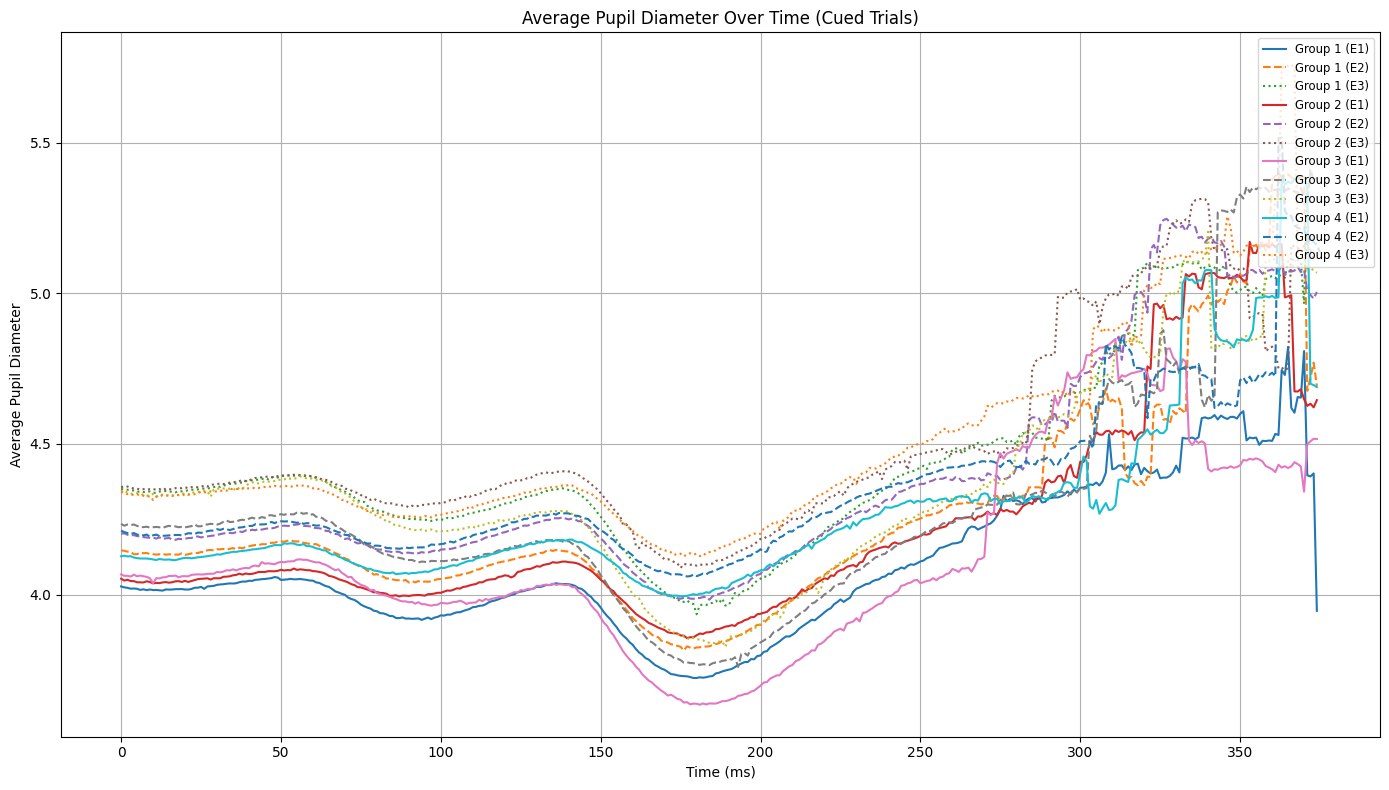

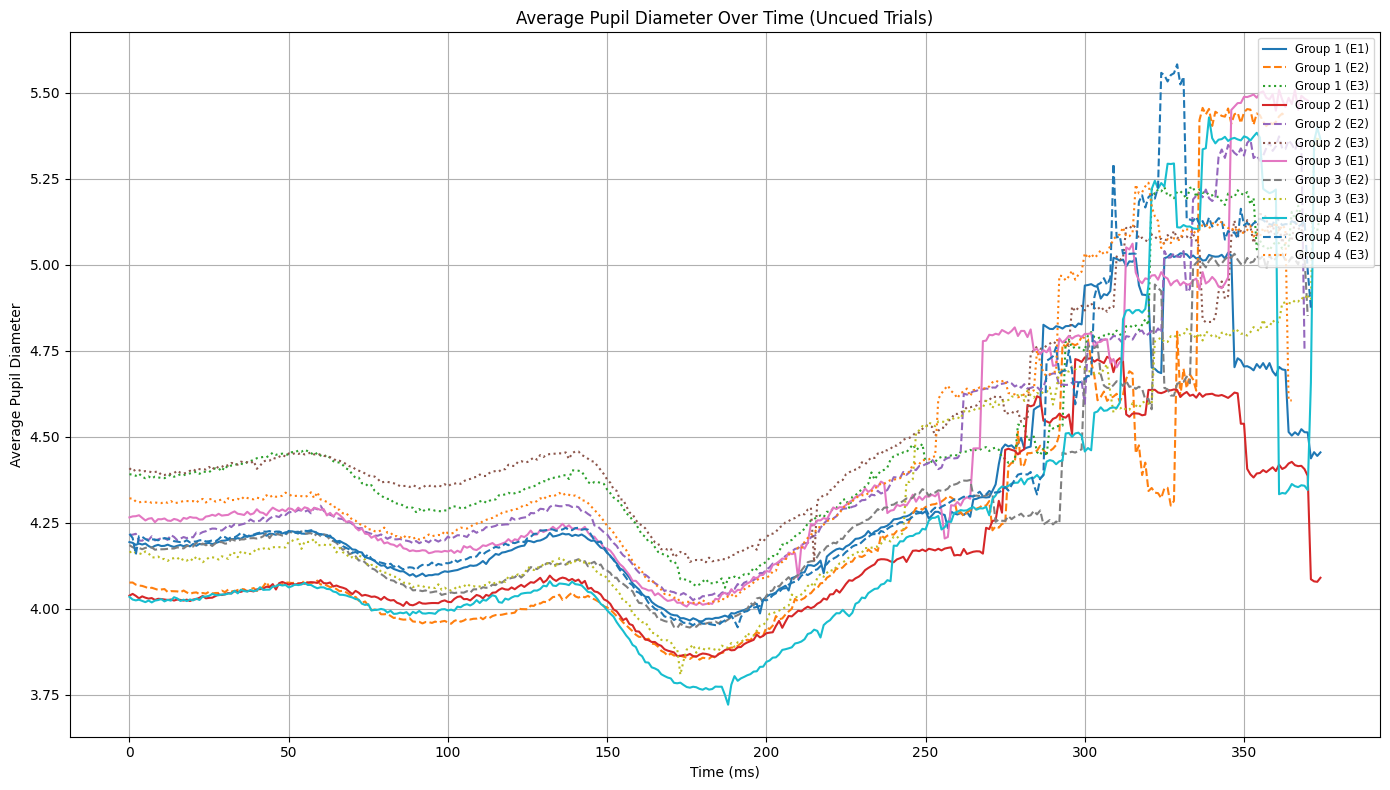

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to your FINAL averaged group-wise data
input_dir = "final_experiment_wise_averages"  

# Trial types and experiments
trial_types = ['cued', 'uncued']
experiments = ['E1', 'E2', 'E3']
groups = ['Group 1', 'Group 2', 'Group 3', 'Group 4']

# Colors or line styles for each experiment
exp_styles = {
    'E1': {'linestyle': '-', 'label': 'E1'},
    'E2': {'linestyle': '--', 'label': 'E2'},
    'E3': {'linestyle': ':', 'label': 'E3'}
}

for trial in trial_types:
    plt.figure(figsize=(14, 8))
    
    for group_index, group in enumerate(groups):
        for exp in experiments:
            filename = f"FINAL_{exp}_{trial}_groupwise_avg.csv"
            filepath = os.path.join(input_dir, filename)

            if not os.path.exists(filepath):
                print(f" Missing: {filepath}")
                continue

            df = pd.read_csv(filepath)
            
            # Ensure group exists in data
            group_row = df[df['Group'] == group]
            if group_row.empty:
                continue

            time_series = group_row.iloc[0, 1:]  # all time columns
            time_points = range(len(time_series))
            label = f"{group} ({exp})"

            plt.plot(time_points, time_series.values,
                     label=label,
                     linestyle=exp_styles[exp]['linestyle'])

    # Titles and labels
    plt.title(f"Average Pupil Diameter Over Time ({trial.title()} Trials)")
    plt.xlabel("Time (ms)")
    plt.ylabel("Average Pupil Diameter")
    plt.legend(loc="upper right", fontsize='small')
    plt.grid(True)
    plt.tight_layout()

    # Save and show
    plt.savefig(f"pupil_diameter_{trial}_plot.png", dpi=300)
    plt.show()
